# Uncovering-Customer-Satisfaction-through-Amazon-Product-Reviews

## Objective:
A Python project that uses Web Scraping techniques to extract product reviews from Amazon.com and performs sentiment analysis on the reviews to uncover customer satisfaction. The project focuses on extracting customer feedback from Amazon product pages to understand customer opinions and gather insights on how satisfied they are with the product.



## Project Outline
- Web scraping the Amazon product page to extract customer reviews.
- Preprocessing the reviews by removing stopwords, punctuation marks, and HTML tags.
- Performing sentiment analysis on the reviews using the NLTK library.
- Plotting the results using visualizations to showcase customer satisfaction.


In [113]:
# importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import nltk

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
import warnings
warnings.filterwarnings('ignore')

In [5]:
# customer reviews page which we want to scrape
url ="https://www.amazon.in/Redmi-Horizon-Qualcomm%C2%AE-SnapdragonTM-Included/product-reviews/B09QS9CWLV/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&pageNumber=1&reviewerType=all_reviews"
url

'https://www.amazon.in/Redmi-Horizon-Qualcomm%C2%AE-SnapdragonTM-Included/product-reviews/B09QS9CWLV/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&pageNumber=1&reviewerType=all_reviews'

In [6]:
# define headers for web-page
headers = {
    "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/109.0", 
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0"
}
headers


{'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/109.0'}

>**Note**: Headers are vital part of every HTTP request as it provides important meta information about incoming requests. This varies from basic information about the client like user agent string, to custom security tokens and client rendering capabilities. To get all the information related to HTTP request Header, you can visit this [website](https://locallhost.com/)

In [7]:
raw = requests.get(url, headers=headers, params= {'url':url, 'wait':2})
soup = BeautifulSoup(raw.text, 'html.parser')
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [8]:
# get soup of each page
def get_soup(url):
    raw = requests.get(url, headers=headers, params= {'url':url, 'wait':2})
    soup = BeautifulSoup(raw.text, 'html.parser')
    return soup

In [18]:
# # get_soup(url)
# <div class="a-row a-spacing-small review-data">
# <span data-hook="review-body" class="a-size-base review-text review-text-content">
  
# </div>

In [25]:
# a = soup.find_all('div',{'data-hook':'review'})
# a

In [24]:
# a[1].find('span',{'data-hook':'review-body'}).text

In [9]:
reviewslist = []
def get_reviews(soup):
    reviews = soup.find_all('div',{'data-hook':'review'})
    try:
        for item in reviews:
            review ={
                'Reviews': item.find('span',{'data-hook':'review-body'}).text.strip(),
            }
            reviewslist.append(review)
    except:
        pass

In [10]:
get_reviews(soup)

In [57]:
# # len(reviewslist)
# reviewslist[9]

In [11]:
len(reviewslist)

10

In [12]:
pd.DataFrame(reviewslist)

,Reviews
0,"The first look of this starbust design is eye catchy...no word to express its design,in hand feel and and it's all physical dimension. the second this which impress me, it's battery backup.....even you playing game hardly for a long time....it gives you sufficient battey backup and charging speed also 33W, is also a good deal at this price. The third impressive factor is it's dual speaker....I have an another phone of 40k and the sound quality is almost same as it. Media playback experience is also enhanced by it's amoled display, very colour charming display...... literally the display quality is unbeatable. The camera notch and dual speaker increase the media playing experience. Other Performance like gaming is also good at this price point. Fingerprint button is also very responsive. All other things and features are good to the price point.Only one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower grade...even my old Redmi Y2 which I exchanged with this, had better camera than this ....So plz I request you to all .... don't buy this for camera....just don't. The images are shown of camera pictures on the website is illustration according to me......I don't recommend you to buy this phone as your camera phone.If you are non camera user then you will surely go for it.Pros- design, in-hand feel, battery and charging, amoled display,dual speakerCons- camera😤😤"
1,Camera is not so good it's averageBack camera is good at this price 💙🌀Look is cool back and front both 🌀Battery 🔋 is great with 33watt fast chargingMobile exchange is great 💙 it's simple and easy 💙🌀Overall good for normal user i purchased for my sister 💙❤️Thank you Amazon for great deal and service 💙🌀
2,"Good performance... Good touch response... Good battery life... Good charging speed...Average camera clarity... Average led flash lightNote : selfie and photo lovers, don't go for it. Average mobile for the money"
3,"50 days usage...1. Good battery LIFE. Bqest for day-day use. 33W charger also good.2. Best display but should've 120hz instead of 90.3. Sturdy in-hand feel4. Stereo speaker is loud and crisp(65-35 split).5. Camera above average... But good concerning the price.6. Buggy UI(minor) as expected. But ui13 all way better than bloody MIUI 12.5.7. 4G chipset SD 680, which is fine... 4G+ always available.8. Some minor issue with WiFi reception. Don't know may be they will fix it through OTA.*** THIS PHONE IS FOR PEOPLE WHO CLICKS PHOTOS HERE & THERE, CASUAL GAMER & BINGE WATCHERS OF WEB SHOWS/MOVIES... ""NOT INTENDED FOR HEAVY GAMING""NOT FOR PUBG, COD LOVERS."
4,If one needs to use this phone only for daily usage purpose this is best for this price range. Don't expect good quality photo or video or gaming.
5,Battery issue battery gets drain i don't know why i think the battery discharge over night
6,Good phone for average users. (4/64 GB)Battery backup is good last for one day after normal usage. If you use it continue on GPS results may vary and get 10-11 hrs backup.Heating issues are much less.Battery charging is very fast gets up to full charge from 0 to 100 within 1 hr 10 mins.Back camera is good in sunlight conditions.Front camera is average very poor makes blurry photos in daylight too.Not recomended for photography & heavy users.Satsfactory performance for daily taskers.
7,Speaker quality is not good
8,Good
9,"Quite a smooth daily driver phone. The overall experience has been satisfactory, camera's good, durability also seems to be good, I've dropped it quite a few times & the gorilla glass 5 seems to be holding up. 120hz feels great. Charging speed is good too, nothing mind-blowing though. Battery life is decent. Lasts quite a bit, but since I keep it in the 120hz mode all the time, it's a little less for me. But I don't have any problem with battery life for now."


In [79]:
# scrape all the reviews using for loop

In [13]:
for i in range(1,500):
    soup = get_soup(f"https://www.amazon.in/Redmi-Horizon-Qualcomm%C2%AE-SnapdragonTM-Included/product-reviews/B09QS9CWLV/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&pageNumber={i}&reviewerType=all_reviews")
    get_reviews(soup)
    if not soup.find('li', {'class':'a-disabled a-list'}):
        pass
    else:
        break

In [14]:
df = pd.DataFrame(reviewslist)
df.head(2)

,Reviews
0,"The first look of this starbust design is eye catchy...no word to express its design,in hand feel and and it's all physical dimension. the second this which impress me, it's battery backup.....even you playing game hardly for a long time....it gives you sufficient battey backup and charging speed also 33W, is also a good deal at this price. The third impressive factor is it's dual speaker....I have an another phone of 40k and the sound quality is almost same as it. Media playback experience is also enhanced by it's amoled display, very colour charming display...... literally the display quality is unbeatable. The camera notch and dual speaker increase the media playing experience. Other Performance like gaming is also good at this price point. Fingerprint button is also very responsive. All other things and features are good to the price point.Only one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower grade...even my old Redmi Y2 which I exchanged with this, had better camera than this ....So plz I request you to all .... don't buy this for camera....just don't. The images are shown of camera pictures on the website is illustration according to me......I don't recommend you to buy this phone as your camera phone.If you are non camera user then you will surely go for it.Pros- design, in-hand feel, battery and charging, amoled display,dual speakerCons- camera😤😤"
1,Camera is not so good it's averageBack camera is good at this price 💙🌀Look is cool back and front both 🌀Battery 🔋 is great with 33watt fast chargingMobile exchange is great 💙 it's simple and easy 💙🌀Overall good for normal user i purchased for my sister 💙❤️Thank you Amazon for great deal and service 💙🌀


In [15]:
df.shape

(5000, 1)

In [16]:
df.isna().sum()

Reviews    0
dtype: int64

In [17]:
df.duplicated().sum()

831

### Data Cleaning

**Before data cleaning , check all the unique characters, digits or alphabets in the total_text**

In [18]:
total_text = " ".join(df.Reviews)
total_text[:2000]

"The first look of this starbust design is eye catchy...no word to express its design,in hand feel and and it's all physical dimension. the second this which impress me, it's battery backup.....even you playing game hardly for a long time....it gives you sufficient battey backup and charging speed also 33W, is also a good deal at this price. The third impressive factor is it's dual speaker....I have an another phone of 40k and the sound quality is almost same as it. Media playback experience is also enhanced by it's amoled display, very colour charming display...... literally the display quality is unbeatable. The camera notch and dual speaker increase the media playing experience. Other Performance like gaming is also good at this price point. Fingerprint button is also very responsive. All other things and features are good to the price point.Only one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the

In [19]:
chars = sorted(list(set(total_text)))
chars

['\n',
 ' ',
 '!',
 '"',
 '#',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '}',
 '~',
 '\xa0',
 '¼',
 'ँ',
 'ं',
 'अ',
 'आ',
 'इ',
 'ई',
 'उ',
 'ऍ',
 'ए',
 'ऑ',
 'ओ',
 'औ',
 'क',
 'ख',
 'ग',
 'घ',
 'च',
 'छ',
 'ज',
 'झ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'थ',
 'द',
 'ध',
 'न',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ल',
 'ळ',
 'व',
 'श',
 'ष',
 'स',
 'ह',
 '़',
 'ा',
 'ि',
 'ी',
 'ु',
 'ू',
 'ृ',
 'ॅ',
 'े',
 'ै',
 'ॉ',
 'ो',
 '्',
 'ड़',
 'ढ़',
 'फ़',
 '।',
 '०',
 '१',
 'ঃ',
 'আ',
 'ই',
 'এ',
 'ক',
 'চ',
 'ছ',
 'ট',
 'ঠ',
 'দ',


In [20]:
vocab_size = len(chars)
print("".join(chars))
print(vocab_size)


 !"#%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_abcdefghijklmnopqrstuvwxyz{}~ ¼ँंअआइईउऍएऑओऔकखगघचछजझटठडढणतथदधनपफबभमयरलळवशषसह़ािीुूृॅेैॉो्ड़ढ़फ़।०१ঃআইএকচছটঠদনফবভলসহািুেো্அஇஎஏஒஓகஙசஜடணதநனபமயரறலளழவாிுூெேைொோ்ంఅఎకగటడతదనపబమయరలవసాిీుూెేైొో్ംആഈഎഒകങചടണതദനപഫമയരറലവസഹാിീുെോ്ൺർൾ‍’“”•…₹℅≈☀☹☺♂♥⚠✌✓❣❤⭐️，𝗡𝗥𝗱𝗲𝗶𝗺𝗼𝘁𝙶𝚊𝚌𝚍𝚎𝚐𝚑𝚒𝚗𝚘𝚙𝚛𝚜𝚝𝟭🌀🌚🍎🎆🎉🎤🎮🏻🏽👌👍👎👏💓💖💗💙💩💯💰💲💵📱📷📸🔊🔋🔌🔥🖼😀😁😂😃😄😅😆😉😊😋😌😍😎😐😑😒😔😕😘😞😠😡😢😣😤😥😭😰😳😶🙁🙂🙃🙄🙌🙏🤔🤗🤟🤣🤦🤩🤬🤳🥰🥵
396


In [21]:
# create a copy of original dataset
new_df = df.copy()


In [22]:
import re
import string

### Extract all the emojis from the text

In [23]:
def extract_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.findall(text)

# text = "This is a text with 😊 emoji"
all_emojis = extract_emojis(total_text)
print(extract_emojis(total_text))


['😤😤', '💙🌀', '🌀', '🔋', '💙', '💙🌀', '💙', '💙🌀', '😤😤', '💙🌀', '🌀', '🔋', '💙', '💙🌀', '💙', '💙🌀', '👌', '😥', '👍', '👍', '😭', '👌👍', '👍', '👍', '🙂👍', '😳', '😍', '🙂😎', '😔', '💖', '🔋', '🙏', '👍👌', '💯👍', '🙂🙂🙂🙂🙂🙂🙂🙂🙂', '😍', '👍', '👍👍', '🙏🏻', '👌', '😍😍', '😒😒😒', '💰', '👍👍👍👍👍👍👍👍', '😀', '👍', '🙁', '🔊', '👍', '📱', '💖🙌🏻', '🔋', '📷', '😀', '😡', '👍', '👍', '🙃', '🙂', '😊', '😌', '👍', '👍', '👍', '📱📱', '👍👍💯', '😊', '😅', '📱', '📷', '🔋', '🔋', '📷', '🙄', '👌', '👍', '👍👍👍👍', '👍', '👍', '😠😠', '👌👌👌👌👌', '😍', '🔥', '👍👍👍', '😍😍😍', '😍😍😍', '👍', '👎', '👍', '👍', '👍', '🎆', '🌚', '👎', '👍', '😂', '🔋', '😞😔', '👌', '😑', '😐', '👍', '👍👍👍👍', '📷', '🔋', '👌🏻', '😍', '👍👍👍', '👌👍', '🔋', '😔', '👍', '👌', '👍', '👌😍', '📱', '😆', '🔋', '🍎', '👍', '😁', '👍', '👍', '😊', '👍', '🙏', '👌', '👌', '💵', '👍😘', '🔥', '👍', '👍', '👍', '😭😭😭😡😡', '😅', '📱', '🏽', '😍😄', '🔋', '👍🏻👍🏻', '😍', '😞', '👍', '👎', '😅', '👍👍👍', '😭😭😭', '😊', '😊', '👍', '😶', '😞', '📱', '👍', '👍🏻', '😊', '👌', '👎', '👌', '👍', '👌', '👍', '👍', '👍', '🔋', '💗💗💗', '💖', '👍👍', '👍👏😊', '👍👍', '👍', '📷📷📷', '👌', '🔋', '👌', '👍', '👍👍👍', '🔋', '👍', '🎮', '😀👍', '👌'

In [25]:
emojis = "".join(all_emojis)
emojis

'😤😤💙🌀🌀🔋💙💙🌀💙💙🌀😤😤💙🌀🌀🔋💙💙🌀💙💙🌀👌😥👍👍😭👌👍👍👍🙂👍😳😍🙂😎😔💖🔋🙏👍👌💯👍🙂🙂🙂🙂🙂🙂🙂🙂🙂😍👍👍👍🙏🏻👌😍😍😒😒😒💰👍👍👍👍👍👍👍👍😀👍🙁🔊👍📱💖🙌🏻🔋📷😀😡👍👍🙃🙂😊😌👍👍👍📱📱👍👍💯😊😅📱📷🔋🔋📷🙄👌👍👍👍👍👍👍👍😠😠👌👌👌👌👌😍🔥👍👍👍😍😍😍😍😍😍👍👎👍👍👍🎆🌚👎👍😂🔋😞😔👌😑😐👍👍👍👍👍📷🔋👌🏻😍👍👍👍👌👍🔋😔👍👌👍👌😍📱😆🔋🍎👍😁👍👍😊👍🙏👌👌💵👍😘🔥👍👍👍😭😭😭😡😡😅📱🏽😍😄🔋👍🏻👍🏻😍😞👍👎😅👍👍👍😭😭😭😊😊👍😶😞📱👍👍🏻😊👌👎👌👍👌👍👍👍🔋💗💗💗💖👍👍👍👏😊👍👍👍📷📷📷👌🔋👌👍👍👍👍🔋👍🎮😀👍👌😥😥😡😤😭😭👎👍👍👍💲💰😤👍👍👍👍👍👍👍👍👍🔥👌🔋👌😘👍👌🔥🔥🔥👌💯😉😌🔋😍😊👌👌👌👌👍👍🔋👍👍👍👍👍🖼🙂😕😔😣📱🔋👍👍😍🔋📷👌😎👍🔋😍👍😊🔋😍😍👍💯🏻🔥💯👍👏😃👍🙃😍😋😊👎🏻👎🏻😉👍😂🙏👌😍🔥😠😠😠😠💯👍🎤📸😊😊👍👍👍📱📷😍😍📷📷😢😢😢👍👌👎😊😊😕👍🎉🔋📷📱😎👍👎👎👎🏻👌👌👌💯👍👍👍👍👍🔋👍💓😔👍👎👎🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😍👌🏻🙂😍😊👍👍🏻👍👍👍💩💩💩💩💩🙂📷😅👍👍👍👏😍😊💯👍👍👍👍👍😊👍👎👍🙏🙏🙏🙏🙏🙏🙏👍👌📱👎😡📷📸😞👌😡🔋🔌😅😡👍📸😰🔋🔊😒👎👍'

### Removal of all the emojis

In [47]:
text = df.Reviews.iloc[1].lower()
text

"camera is not so good it's  averageback camera is good at this price look is cool back and front both battery  is great with 33watt fast chargingmobile exchange is great  it's simple and easy overall good  for normal user i purchased for my sister ️thank you amazon for great deal and service "

In [39]:

def remove_emojis(text):
    text = text.lower()
    emoji_pattern = re.compile(u'[\U0001f600-\U0001f64f\U0001f300-\U0001f5ff\U0001f680-\U0001f6ff\U0001f1e0-\U0001f1ff\U00002702-\U000027b0]+', re.UNICODE)
    return emoji_pattern.sub(r'', text)

# text = "This is a text with 😊 emoji"
print(remove_emojis(text))


camera is not so good it's  averageback camera is good at this price look is cool back and front both battery  is great with 33watt fast chargingmobile exchange is great  it's simple and easy overall good  for normal user i purchased for my sister ️thank you amazon for great deal and service 


In [40]:
df.head(3)
df.columns

Index(['Reviews'], dtype='object')

In [46]:
new_df.Reviews = new_df.Reviews.apply(remove_emojis)
new_df.head(3)

,Reviews
0,"the first look of this starbust design is eye catchy...no word to express its design,in hand feel and and it's all physical dimension. the second this which impress me, it's battery backup.....even you playing game hardly for a long time....it gives you sufficient battey backup and charging speed also 33w, is also a good deal at this price. the third impressive factor is it's dual speaker....i have an another phone of 40k and the sound quality is almost same as it. media playback experience is also enhanced by it's amoled display, very colour charming display...... literally the display quality is unbeatable. the camera notch and dual speaker increase the media playing experience. other performance like gaming is also good at this price point. fingerprint button is also very responsive. all other things and features are good to the price point.only one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower grade...even my old redmi y2 which i exchanged with this, had better camera than this ....so plz i request you to all .... don't buy this for camera....just don't. the images are shown of camera pictures on the website is illustration according to me......i don't recommend you to buy this phone as your camera phone.if you are non camera user then you will surely go for it.pros- design, in-hand feel, battery and charging, amoled display,dual speakercons- camera"
1,camera is not so good it's averageback camera is good at this price look is cool back and front both battery is great with 33watt fast chargingmobile exchange is great it's simple and easy overall good for normal user i purchased for my sister ️thank you amazon for great deal and service
2,"good performance... good touch response... good battery life... good charging speed...average camera clarity... average led flash lightnote : selfie and photo lovers, don't go for it. average mobile for the money"


### Removal of Punctuation symbols

#### First Method

In [51]:
# text = "Hello, World! How are you?"
def remove_punctuation(input_string):
    
    # Define a pattern to match all punctuation symbols
    pattern = r'[^\w\s]'
    # Replace all punctuation symbols with an empty string
    return re.sub(pattern, '', input_string)

no_punct = remove_punctuation(text)

no_punct

'camera is not so good its  averageback camera is good at this price look is cool back and front both battery  is great with 33watt fast chargingmobile exchange is great  its simple and easy overall good  for normal user i purchased for my sister thank you amazon for great deal and service '

#### Second Method

In [52]:
import string

# Create a string with all the punctuation symbols
punctuations = string.punctuation


# Replace each punctuation symbol with an empty string
for symbol in punctuations:
    text = text.replace(symbol, "")

text

'camera is not so good its  averageback camera is good at this price look is cool back and front both battery  is great with 33watt fast chargingmobile exchange is great  its simple and easy overall good  for normal user i purchased for my sister ️thank you amazon for great deal and service '

In [54]:
new_df.Reviews = new_df.Reviews.apply(remove_punctuation)
new_df.head(3)

,Reviews
0,the first look of this starbust design is eye catchyno word to express its designin hand feel and and its all physical dimension the second this which impress me its battery backupeven you playing game hardly for a long timeit gives you sufficient battey backup and charging speed also 33w is also a good deal at this price the third impressive factor is its dual speakeri have an another phone of 40k and the sound quality is almost same as it media playback experience is also enhanced by its amoled display very colour charming display literally the display quality is unbeatable the camera notch and dual speaker increase the media playing experience other performance like gaming is also good at this price point fingerprint button is also very responsive all other things and features are good to the price pointonly one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower gradeeven my old redmi y2 which i exchanged with this had better camera than this so plz i request you to all dont buy this for camerajust dont the images are shown of camera pictures on the website is illustration according to mei dont recommend you to buy this phone as your camera phoneif you are non camera user then you will surely go for itpros design inhand feel battery and charging amoled displaydual speakercons camera
1,camera is not so good its averageback camera is good at this price look is cool back and front both battery is great with 33watt fast chargingmobile exchange is great its simple and easy overall good for normal user i purchased for my sister thank you amazon for great deal and service
2,good performance good touch response good battery life good charging speedaverage camera clarity average led flash lightnote selfie and photo lovers dont go for it average mobile for the money


In [55]:
total_text = " ".join(new_df.Reviews)
chars = sorted(list(set(total_text)))
vocab_size = len(chars)
print("".join(chars))
print(vocab_size)


 0123456789_abcdefghijklmnopqrstuvwxyz ¼अआइईउऍएऑओऔकखगघचछजझटठडढणतथदधनपफबभमयरलळवशषसहड़ढ़फ़०१আইএকচছটঠদনফবভলসহஅஇஎஏஒஓகஙசஜடணதநனபமயரறலளழவఅఎకగటడతదనపబమయరలవసആഈഎഒകങചടണതദനപഫമയരറലവസഹൺർൾ𝗡𝗥𝗱𝗲𝗶𝗺𝗼𝘁𝙶𝚊𝚌𝚍𝚎𝚐𝚑𝚒𝚗𝚘𝚙𝚛𝚜𝚝𝟭
193


#### Removal of mixture of various scripts and Characters
- It appears to be a mixture of various scripts and characters, including Devanagari, Bengali, Brahmi, Brahmic, and mathematical symbols. 
- To convert a mixture of various scripts and characters, including Devanagari, Bengali, Brahmi, Brahmic, and mathematical symbols into English characters for sentiment analysis purpose, you can use the Unicode standardization system. The Unicode standard assigns a unique number to each character in the script, called a code point. This makes it possible to translate text written in any script into English characters by mapping the code points of the characters to their English equivalents.

- One approach is to use a library such as Unidecode or OpenAI's GPT-3 to automatically translate the text into ASCII characters. Another approach is to manually map the characters to their English equivalents using a translation table. However, this approach can be time-consuming and prone to errors

In [56]:
from unidecode import unidecode
text = "¼अआइईउऍएऑओऔकखगघचछजझटठडढणतथदधनपफबभमयरलळवशषसहड़ढ़फ़०१আইএকচছটঠদনফবভলসহஅஇஎஏஒஓகஙசஜடணதநனபமயரறலளழவఅఎకగటడతదనపబమయరలవసആഈഎഒകങചടണതദനപഫമയരറലവസഹൺർൾ𝗡𝗥𝗱𝗲𝗶𝗺𝗼𝘁𝙶𝚊𝚌𝚍𝚎𝚐𝚑𝚒𝚗𝚘𝚙𝚛𝚜𝚝𝟭"
print(unidecode(text))


 1/4aaaiiiueNeoNoaukkhgghcchjjhtttthddddhnntthddhnpphbbhmyrllvshssshdddhrhf01aaiekcchtttthdnphbbhlshaieeeoookngcjttnntnnnnpmyrrrllllllvaekgttddtdnpbmyrlvsaaiieokngcttnntdnpphmyrrrlvshNRdeimotGacdeghinoprst1


In [63]:
from unidecode import unidecode

def convert_to_ascii(text):
    return unidecode(text)

# input_text = "¼अआइईउऍएऑओऔकखगघचछजझटठडढणतथदधनपफबभमयरलळवशषसहड़ढ़फ़०१আইএকচছটঠদনফবভলসহஅஇஎஏஒஓகஙசஜடணதநனபமயரறலளழவఅఎకగటడతదనపబమయరలవసആഈഎഒകങചടണതദനപഫമയരറലവസഹൺർൾ𝗡𝗥𝗱𝗲𝗶𝗺𝗼𝘁𝙶𝚊𝚌𝚍𝚎𝚐𝚑𝚒𝚗𝚘𝚙𝚛𝚜𝚝𝟭"
output_text = convert_to_ascii(new_df.Reviews.iloc[2])


In [62]:
output_text

'good performance good touch response good battery life good charging speedaverage camera clarity average led flash lightnote  selfie and photo lovers dont go for it  average mobile for the money'

In [70]:
new_df.Reviews=  new_df.Reviews.apply(convert_to_ascii)
new_df.head(3)

,Reviews
0,the first look of this starbust design is eye catchyno word to express its designin hand feel and and its all physical dimension the second this which impress me its battery backupeven you playing game hardly for a long timeit gives you sufficient battey backup and charging speed also 33w is also a good deal at this price the third impressive factor is its dual speakeri have an another phone of 40k and the sound quality is almost same as it media playback experience is also enhanced by its amoled display very colour charming display literally the display quality is unbeatable the camera notch and dual speaker increase the media playing experience other performance like gaming is also good at this price point fingerprint button is also very responsive all other things and features are good to the price pointonly one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower gradeeven my old redmi y2 which i exchanged with this had better camera than this so plz i request you to all dont buy this for camerajust dont the images are shown of camera pictures on the website is illustration according to mei dont recommend you to buy this phone as your camera phoneif you are non camera user then you will surely go for itpros design inhand feel battery and charging amoled displaydual speakercons camera
1,camera is not so good its averageback camera is good at this price look is cool back and front both battery is great with 33watt fast chargingmobile exchange is great its simple and easy overall good for normal user i purchased for my sister thank you amazon for great deal and service
2,good performance good touch response good battery life good charging speedaverage camera clarity average led flash lightnote selfie and photo lovers dont go for it average mobile for the money


In [71]:
total_text = " ".join(new_df.Reviews)
chars = sorted(list(set(total_text)))
vocab_size = len(chars)
print("".join(chars))
print(vocab_size)


 /0123456789GNR_abcdefghijklmnopqrstuvwxyz
43


#### Removal of `_` and `/` from the text

In [72]:
def remove_chars(text):
    return text.replace("_", "").replace("/", "")


In [75]:
new_df['cleaned_Reviews'] =  new_df.Reviews.apply(remove_chars)
new_df.head(3)

,Reviews,cleaned_Reviews
0,the first look of this starbust design is eye catchyno word to express its designin hand feel and and its all physical dimension the second this which impress me its battery backupeven you playing game hardly for a long timeit gives you sufficient battey backup and charging speed also 33w is also a good deal at this price the third impressive factor is its dual speakeri have an another phone of 40k and the sound quality is almost same as it media playback experience is also enhanced by its amoled display very colour charming display literally the display quality is unbeatable the camera notch and dual speaker increase the media playing experience other performance like gaming is also good at this price point fingerprint button is also very responsive all other things and features are good to the price pointonly one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower gradeeven my old redmi y2 which i exchanged with this had better camera than this so plz i request you to all dont buy this for camerajust dont the images are shown of camera pictures on the website is illustration according to mei dont recommend you to buy this phone as your camera phoneif you are non camera user then you will surely go for itpros design inhand feel battery and charging amoled displaydual speakercons camera,the first look of this starbust design is eye catchyno word to express its designin hand feel and and its all physical dimension the second this which impress me its battery backupeven you playing game hardly for a long timeit gives you sufficient battey backup and charging speed also 33w is also a good deal at this price the third impressive factor is its dual speakeri have an another phone of 40k and the sound quality is almost same as it media playback experience is also enhanced by its amoled display very colour charming display literally the display quality is unbeatable the camera notch and dual speaker increase the media playing experience other performance like gaming is also good at this price point fingerprint button is also very responsive all other things and features are good to the price pointonly one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower gradeeven my old redmi y2 which i exchanged with this had better camera than this so plz i request you to all dont buy this for camerajust dont the images are shown of camera pictures on the website is illustration according to mei dont recommend you to buy this phone as your camera phoneif you are non camera user then you will surely go for itpros design inhand feel battery and charging amoled displaydual speakercons camera
1,camera is not so good its averageback camera is good at this price look is cool back and front both battery is great with 33watt fast chargingmobile exchange is great its simple and easy overall good for normal user i purchased for my sister thank you amazon for great deal and service,camera is not so good its averageback camera is good at this price look is cool back and front both battery is great with 33watt fast chargingmobile exchange is great its simple and easy overall good for normal user i purchased for my sister thank you amazon for great deal and service
2,good performance good touch response good battery life good charging speedaverage camera clarity average led flash lightnote selfie and photo lovers dont go for it average mobile for the money,good performance good touch response good battery life good charging speedaverage camera clarity average led flash lightnote selfie and photo lovers dont go for it average mobile for the money


In [76]:
total_text = " ".join(new_df.Reviews)
chars = sorted(list(set(total_text)))
vocab_size = len(chars)
print("".join(chars))
print(vocab_size)


 0123456789GNRabcdefghijklmnopqrstuvwxyz
41


In [84]:
# def replace_chars(text):
#     text = text.strip()
#     if 'G'  in text:
#         text.replace('G', 'g')
#     elif 'N' in text:
#         text.replace('N', 'n')
        
#     elif 'R' in text:
#         text.replace('R', 'R')
#     else:
#         pass
#     return text

In [90]:
def remove_space(text):
    text = text.strip()
    return text
new_df.cleaned_Reviews =  new_df.cleaned_Reviews.apply(remove_space)
new_df.head(2)

,Reviews,cleaned_Reviews
0,the first look of this starbust design is eye catchyno word to express its designin hand feel and and its all physical dimension the second this which impress me its battery backupeven you playing game hardly for a long timeit gives you sufficient battey backup and charging speed also 33w is also a good deal at this price the third impressive factor is its dual speakeri have an another phone of 40k and the sound quality is almost same as it media playback experience is also enhanced by its amoled display very colour charming display literally the display quality is unbeatable the camera notch and dual speaker increase the media playing experience other performance like gaming is also good at this price point fingerprint button is also very responsive all other things and features are good to the price pointonly one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower gradeeven my old redmi y2 which i exchanged with this had better camera than this so plz i request you to all dont buy this for camerajust dont the images are shown of camera pictures on the website is illustration according to mei dont recommend you to buy this phone as your camera phoneif you are non camera user then you will surely go for itpros design inhand feel battery and charging amoled displaydual speakercons camera,the first look of this starbust design is eye catchyno word to express its designin hand feel and and its all physical dimension the second this which impress me its battery backupeven you playing game hardly for a long timeit gives you sufficient battey backup and charging speed also 33w is also a good deal at this price the third impressive factor is its dual speakeri have an another phone of 40k and the sound quality is almost same as it media playback experience is also enhanced by its amoled display very colour charming display literally the display quality is unbeatable the camera notch and dual speaker increase the media playing experience other performance like gaming is also good at this price point fingerprint button is also very responsive all other things and features are good to the price pointonly one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower gradeeven my old redmi y2 which i exchanged with this had better camera than this so plz i request you to all dont buy this for camerajust dont the images are shown of camera pictures on the website is illustration according to mei dont recommend you to buy this phone as your camera phoneif you are non camera user then you will surely go for itpros design inhand feel battery and charging amoled displaydual speakercons camera
1,camera is not so good its averageback camera is good at this price look is cool back and front both battery is great with 33watt fast chargingmobile exchange is great its simple and easy overall good for normal user i purchased for my sister thank you amazon for great deal and service,camera is not so good its averageback camera is good at this price look is cool back and front both battery is great with 33watt fast chargingmobile exchange is great its simple and easy overall good for normal user i purchased for my sister thank you amazon for great deal and service


In [91]:
total_text = " ".join(new_df.cleaned_Reviews)
chars = sorted(list(set(total_text)))
vocab_size = len(chars)
print("".join(chars))
print(vocab_size)


 0123456789GNRabcdefghijklmnopqrstuvwxyz
41


In [93]:
new_df.shape

(5000, 2)

In [94]:
new_df = new_df[new_df.cleaned_Reviews != '']


## Begin with TextBlob

- It uses `NLTK` (Natural Language ToolKit) and the input contains a single sentence
- The output of TextBlob is **polarity** and **subjectivity**. 
- **Polarity** score lies between (-1 to 1) where -1 identifies the most negative words such as `disgusting`, `awful`, `pathetic`, and 1 identifies the most positive words like `excellent`, `best`. 
- **Subjectivity** score lies between (0 and 1), It shows the amount of personal opinion, If a sentence has high subjectivity i.e. close to 1, It resembles that the text contains more personal opinion than factual information. 
- The **correct()** method in TextBlob library is used to automatically correct spelling mistakes in a text. It uses a language model to identify likely errors in the text and replaces them with most likely correct words.

In [95]:
from textblob import TextBlob

In [96]:
sentence = "The weather today is pleasant"
result = TextBlob(sentence)
result

TextBlob("The weather today is pleasant")

In [97]:
# check polarity of the sentence
result.sentiment.polarity

0.7333333333333333

In [98]:
# check subjectivity of the sentence
result.sentiment.subjectivity

0.9666666666666667

In [99]:
result.ngrams(2)

[WordList(['The', 'weather']),
 WordList(['weather', 'today']),
 WordList(['today', 'is']),
 WordList(['is', 'pleasant'])]

In [101]:
text = "I hav a dreem"
blob = TextBlob(text)
corrected_text = blob.correct()

corrected_text

TextBlob("I had a dream")

#### apply these changes to see impact

In [102]:
new_df.cleaned_Reviews[:10].apply(lambda x: str(TextBlob(x).correct()))

0    the first look of this starbust design is eye catching word to express its designing hand feel and and its all physical dimension the second this which impress me its battery backupeven you playing game hardly for a long time gives you sufficient battery back and charging speed also now is also a good deal at this price the third impressive factor is its dual speaker have an another phone of ask and the sound quality is almost same as it media playback experience is also enhanced by its ambled display very colour charming display literally the display quality is unbearable the camera notch and dual speaker increase the media playing experience other performance like gazing is also good at this price point fingerprint button is also very responsive all other things and features are good to the price pointedly one thing is very disappointing boy the hope of its camera that company shows is very up to the mark and professional photography but the camera is lower gradeeven my old red 

In [103]:
new_df

,Reviews,cleaned_Reviews
0,the first look of this starbust design is eye catchyno word to express its designin hand feel and and its all physical dimension the second this which impress me its battery backupeven you playing game hardly for a long timeit gives you sufficient battey backup and charging speed also 33w is also a good deal at this price the third impressive factor is its dual speakeri have an another phone of 40k and the sound quality is almost same as it media playback experience is also enhanced by its amoled display very colour charming display literally the display quality is unbeatable the camera notch and dual speaker increase the media playing experience other performance like gaming is also good at this price point fingerprint button is also very responsive all other things and features are good to the price pointonly one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower gradeeven my old redmi y2 which i exchanged with this had better camera than this so plz i request you to all dont buy this for camerajust dont the images are shown of camera pictures on the website is illustration according to mei dont recommend you to buy this phone as your camera phoneif you are non camera user then you will surely go for itpros design inhand feel battery and charging amoled displaydual speakercons camera,the first look of this starbust design is eye catchyno word to express its designin hand feel and and its all physical dimension the second this which impress me its battery backupeven you playing game hardly for a long timeit gives you sufficient battey backup and charging speed also 33w is also a good deal at this price the third impressive factor is its dual speakeri have an another phone of 40k and the sound quality is almost same as it media playback experience is also enhanced by its amoled display very colour charming display literally the display quality is unbeatable the camera notch and dual speaker increase the media playing experience other performance like gaming is also good at this price point fingerprint button is also very responsive all other things and features are good to the price pointonly one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower gradeeven my old redmi y2 which i exchanged with this had better camera than this so plz i request you to all dont buy this for camerajust dont the images are shown of camera pictures on the website is illustration according to mei dont recommend you to buy this phone as your camera phoneif you are non camera user then you will surely go for itpros design inhand feel battery and charging amoled displaydual speakercons camera
1,camera is not so good its averageback camera is good at this price look is cool back and front both battery is great with 33watt fast chargingmobile exchange is great its simple and easy overall good for normal user i purchased for my sister thank you amazon for great deal and service,camera is not so good its averageback camera is good at this price look is cool back and front both battery is great with 33watt fast chargingmobile exchange is great its simple and easy overall good for normal user i purchased for my sister thank you amazon for great deal and service
2,good performance good touch response good battery life good charging speedaverage camera clarity average led flash lightnote selfie and photo lovers dont go for it average mobile for the money,good performance good touch response good battery life good charging speedaverage camera clarity average led flash lightnote selfie and photo lovers dont go for it average mobile for the money
3,50 days usage1 good battery life bqest for dayday use 33w charger also good2 best display but shouldve 120hz instead of 903 sturdy inhand feel4 stereo speaker is loud and crisp6535 split5 camera 

In [104]:
new_df.duplicated().sum()

787

In [105]:
new_df.cleaned_Reviews.duplicated().sum()

812

In [106]:
new_df.drop_duplicates(subset=['cleaned_Reviews'], keep=False)

,Reviews,cleaned_Reviews
20,dont buy this phone its a wrong choice its not working after 5months icu board gone stuggling to get service thank you,dont buy this phone its a wrong choice its not working after 5months icu board gone stuggling to get service thank you
22,it does what the description sayscamera quality not upto the mark compared to other redmi mobiles even a3 model clicks better picsfinger print sensor is same as that of the lock button you need to press the lock button every time to get the fingerprint readvolume is good for both call and streamingfast charging but charger gets heated soonbattery back up is good unless you dont do heavy gaming and all day video sreamingdual app and dual space option is missinglight weight and good video resolutionoverall good for learning students for online sessions and persons with less need for photography gaming,it does what the description sayscamera quality not upto the mark compared to other redmi mobiles even a3 model clicks better picsfinger print sensor is same as that of the lock button you need to press the lock button every time to get the fingerprint readvolume is good for both call and streamingfast charging but charger gets heated soonbattery back up is good unless you dont do heavy gaming and all day video sreamingdual app and dual space option is missinglight weight and good video resolutionoverall good for learning students for online sessions and persons with less need for photography gaming
23,i was looking for a budget phone with fast charging capability for a long time for my momfinally came across thiskids drain out the battery pretty fast because of gaming and stuffcamera is not good but then i dont need it,i was looking for a budget phone with fast charging capability for a long time for my momfinally came across thiskids drain out the battery pretty fast because of gaming and stuffcamera is not good but then i dont need it
24,bought this phone since my old phone was giving me network related troubles and also the processor was not powerful enough to handle latest apps this phone is excellent to do regular tasks like social media apps browsing youtube online study etc processor is capable enough to handle normal tasks related to our day to day affairsit has ufs 22 storage feature which makes app opening snappier initially i wanted to go with moto g31 but this phone easily beats g31 in value for money department my only concern with this phone was the adscrapware in miui but surprisingly xiaomi has manage to reduce it a lot and if you carefully disable the relevant options within the miui you will not get any adsregarding camera it has average camera quality nothing impressive but this was expected in the price range and im ok with it cause im not a selfie shooter i have my own dslr which i use for any special kind of photography video is not that great its ok for one time viewing or for sharing on social mediaprocessor is ok it can handle most regular daily tasks without any issues occasional hiccups are expected but they are understandable in terms of priceperformance ratio what surprised me is that my moms redmi note 5 has snapdragon 625 processor which has 4k video recording but this one doesnt despite it being superior to 625 processor it would be great if xiaomi can enable at least 1080p60fps in the next updatephone has all the important sensors like gyroscope compass etc many times in this prices range gyro or compass sensor is absent which are important sensors i use google maps a lot for navigation so compass comes handy to know my directionscreen is excellent its on par with 2025k phone range 90hz is smooth sunlight visibility in outdoor is great my old phone had ips panel which was excellent but sunlight visibility was very poor this is just brilliant content watching is immersive also its not too big either like 67 inches phone which are cumbersome to carry in pants this one is sleek lookingbattery is above average tbh xiaomi needs to do bette

In [107]:
new_df.shape

(4848, 2)

In [112]:
freq = pd.Series(' '.join(new_df.cleaned_Reviews).split()).value_counts()[:10]
freq

is        3541
good      2359
the       2063
phone     1906
and       1906
camera    1748
this      1617
not       1606
for       1329
i         1274
dtype: int64

In [111]:
# pd.Series(" ".join(new_df.cleaned_Reviews).split()).value_counts()[:10]

In [115]:
# nltk.download('popular')


### Removal of Stop words


In [116]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [118]:
text = "This is a sample text with some stopping words"
filtered_text = ' '.join(word for word in text.split() if word.lower() not in stop)
filtered_text

'sample text stopping words'

In [121]:
new_df.cleaned_Reviews =   new_df.cleaned_Reviews.apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop))
new_df.head(2)

,Reviews,cleaned_Reviews
0,the first look of this starbust design is eye catchyno word to express its designin hand feel and and its all physical dimension the second this which impress me its battery backupeven you playing game hardly for a long timeit gives you sufficient battey backup and charging speed also 33w is also a good deal at this price the third impressive factor is its dual speakeri have an another phone of 40k and the sound quality is almost same as it media playback experience is also enhanced by its amoled display very colour charming display literally the display quality is unbeatable the camera notch and dual speaker increase the media playing experience other performance like gaming is also good at this price point fingerprint button is also very responsive all other things and features are good to the price pointonly one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the camera is lower gradeeven my old redmi y2 which i exchanged with this had better camera than this so plz i request you to all dont buy this for camerajust dont the images are shown of camera pictures on the website is illustration according to mei dont recommend you to buy this phone as your camera phoneif you are non camera user then you will surely go for itpros design inhand feel battery and charging amoled displaydual speakercons camera,first look starbust design eye catchyno word express designin hand feel physical dimension second impress battery backupeven playing game hardly long timeit gives sufficient battey backup charging speed also 33w also good deal price third impressive factor dual speakeri another phone 40k sound quality almost media playback experience also enhanced amoled display colour charming display literally display quality unbeatable camera notch dual speaker increase media playing experience performance like gaming also good price point fingerprint button also responsive things features good price pointonly one thing disappointing bcoz hype camera company shows mark professional photography camera lower gradeeven old redmi y2 exchanged better camera plz request dont buy camerajust dont images shown camera pictures website illustration according mei dont recommend buy phone camera phoneif non camera user surely go itpros design inhand feel battery charging amoled displaydual speakercons camera
1,camera is not so good its averageback camera is good at this price look is cool back and front both battery is great with 33watt fast chargingmobile exchange is great its simple and easy overall good for normal user i purchased for my sister thank you amazon for great deal and service,camera good averageback camera good price look cool back front battery great 33watt fast chargingmobile exchange great simple easy overall good normal user purchased sister thank amazon great deal service


In [122]:
TextBlob(new_df.cleaned_Reviews[4]).ngrams(1)

[WordList(['one']),
 WordList(['needs']),
 WordList(['use']),
 WordList(['phone']),
 WordList(['daily']),
 WordList(['usage']),
 WordList(['purpose']),
 WordList(['best']),
 WordList(['price']),
 WordList(['range']),
 WordList(['dont']),
 WordList(['expect']),
 WordList(['good']),
 WordList(['quality']),
 WordList(['photo']),
 WordList(['video']),
 WordList(['gaming'])]

In [123]:
TextBlob(new_df.cleaned_Reviews[4]).ngrams(2)

[WordList(['one', 'needs']),
 WordList(['needs', 'use']),
 WordList(['use', 'phone']),
 WordList(['phone', 'daily']),
 WordList(['daily', 'usage']),
 WordList(['usage', 'purpose']),
 WordList(['purpose', 'best']),
 WordList(['best', 'price']),
 WordList(['price', 'range']),
 WordList(['range', 'dont']),
 WordList(['dont', 'expect']),
 WordList(['expect', 'good']),
 WordList(['good', 'quality']),
 WordList(['quality', 'photo']),
 WordList(['photo', 'video']),
 WordList(['video', 'gaming'])]

In [124]:
TextBlob(new_df.cleaned_Reviews[4]).ngrams(3)

[WordList(['one', 'needs', 'use']),
 WordList(['needs', 'use', 'phone']),
 WordList(['use', 'phone', 'daily']),
 WordList(['phone', 'daily', 'usage']),
 WordList(['daily', 'usage', 'purpose']),
 WordList(['usage', 'purpose', 'best']),
 WordList(['purpose', 'best', 'price']),
 WordList(['best', 'price', 'range']),
 WordList(['price', 'range', 'dont']),
 WordList(['range', 'dont', 'expect']),
 WordList(['dont', 'expect', 'good']),
 WordList(['expect', 'good', 'quality']),
 WordList(['good', 'quality', 'photo']),
 WordList(['quality', 'photo', 'video']),
 WordList(['photo', 'video', 'gaming'])]

In [127]:
freq_Sw = pd.Series(' '.join(new_df.cleaned_Reviews).split()).value_counts()[:20]
freq_Sw

good           2359
phone          1906
camera         1748
quality        1085
battery        711 
mobile         575 
price          475 
display        474 
product        469 
redmi          410 
like           388 
nice           374 
best           347 
also           343 
note           330 
dont           328 
buy            327 
performance    317 
life           310 
bad            305 
dtype: int64

In [ ]:
word_freq_df['frequency'] = word_freq_df['occurrences'] / np.sum(word_freq_df['occurrences'])
word_freq_df.sort_values('occurrences',ascending = False).head()

### Fetching sentiment from text

In [132]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'



In [133]:
new_df.cleaned_Reviews.apply(lambda text: fetch_sentiment_using_textblob(text))


0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
4995    positive
4996    positive
4997    negative
4998    negative
4999    positive
Name: cleaned_Reviews, Length: 4848, dtype: object

In [134]:
fetch_sentiment_using_textblob =   new_df.cleaned_Reviews.apply(lambda text: fetch_sentiment_using_textblob(text))
pd.DataFrame(fetch_sentiment_using_textblob.value_counts())

,cleaned_Reviews
positive,4105
negative,743


In [143]:
sentiment =  pd.DataFrame(fetch_sentiment_using_textblob.value_counts())
# sns.countplot(x= pd.DataFrame(fetch_sentiment_using_textblob.value_counts()))
sentiment

,cleaned_Reviews
positive,4105
negative,743


In [155]:
labels = list(sentiment.index)
values = list(sentiment.values)
# type(values)
values
# labels
# sentiment.index

[array([4105]), array([743])]

In [158]:
new_values = []
for i in values:
    new_values.append(i[0])

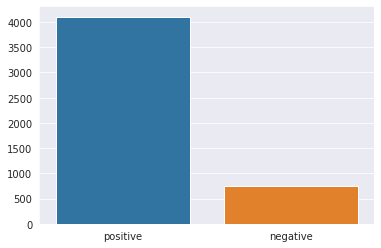

In [161]:
sns.set_style('darkgrid')
sns.barplot(x=labels, y=new_values);


### The Game Changer:  VADER (Valence Aware Dictionary and Sentiment Reasoner)

- **VADER** is another Lexicon-based sentiment analyzer that has pre-defined rules for words or lexicons. 
- **VADER** not only tells the lexicon is `positive`, `negative`, or `neutral`, it also tells how positive, negative, or neutral a sentence is. 
- The `output` from VADER comes in a Python dictionary in which we have four keys and their corresponding values. `neg`, `neu`, `pos`, and `compound` which stands for Negative, Neutral, and Positive respectively. 
- The Compound score is an indispensable score that is calculated by normalizing the other 3 scores (neg, neu, pos) between -1 and +1. The decision criteria are similar to TextBlob -1 is for `most negative` and +1 is for `most positive`.

In [135]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
obj = SentimentIntensityAnalyzer()
obj

In [136]:
obj.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.5106}

In [137]:
obj.polarity_scores(new_df.cleaned_Reviews[4])

{'neg': 0.111, 'neu': 0.694, 'pos': 0.194, 'compound': 0.4203}

In [162]:
df_score=pd.DataFrame()
df_score['Cleaned_Reviews'] = new_df.cleaned_Reviews


In [164]:
df_score['scores'] = new_df.cleaned_Reviews.apply(lambda review: obj.polarity_scores(review))
df_score

,Cleaned_Reviews,scores
0,first look starbust design eye catchyno word express designin hand feel physical dimension second impress battery backupeven playing game hardly long timeit gives sufficient battey backup charging speed also 33w also good deal price third impressive factor dual speakeri another phone 40k sound quality almost media playback experience also enhanced amoled display colour charming display literally display quality unbeatable camera notch dual speaker increase media playing experience performance like gaming also good price point fingerprint button also responsive things features good price pointonly one thing disappointing bcoz hype camera company shows mark professional photography camera lower gradeeven old redmi y2 exchanged better camera plz request dont buy camerajust dont images shown camera pictures website illustration according mei dont recommend buy phone camera phoneif non camera user surely go itpros design inhand feel battery charging amoled displaydual speakercons camera,"{'neg': 0.045, 'neu': 0.717, 'pos': 0.238, 'compound': 0.9824}"
1,camera good averageback camera good price look cool back front battery great 33watt fast chargingmobile exchange great simple easy overall good normal user purchased sister thank amazon great deal service,"{'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'compound': 0.9825}"
2,good performance good touch response good battery life good charging speedaverage camera clarity average led flash lightnote selfie photo lovers dont go average mobile money,"{'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'compound': 0.9493}"
3,50 days usage1 good battery life bqest dayday use 33w charger also good2 best display shouldve 120hz instead 903 sturdy inhand feel4 stereo speaker loud crisp6535 split5 camera average good concerning price6 buggy uiminor expected ui13 way better bloody miui 1257 4g chipset sd 680 fine 4g always available8 minor issue wifi reception dont know may fix ota phone people clicks photos casual gamer binge watchers web showsmovies intended heavy gamingnot pubg cod lovers,"{'neg': 0.033, 'neu': 0.743, 'pos': 0.224, 'compound': 0.9432}"
4,one needs use phone daily usage purpose best price range dont expect good quality photo video gaming,"{'neg': 0.111, 'neu': 0.694, 'pos': 0.194, 'compound': 0.4203}"
...,...,...
4995,charger worth 3w though claimed 33w takes 23 hours charging get 5060 charge,"{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.2263}"
4996,possible got faulty phone never experience getting faulty phone pissed offthe phone hangs reboots self loop crashes opening certain appsover happy purchase,"{'neg': 0.208, 'neu': 0.544, 'pos': 0.248, 'compound': 0.0675}"
4997,poor camera quality,"{'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}"
4998,worst product dont buy return option also technical person yet visited closed ticket customer care also responding,"{'neg': 0.184, 'neu': 0.673, 'pos': 0.143, 'compound': -0.2263}"


In [165]:
df_score['compound'] = df_score['scores'].apply(lambda scores: scores['compound'])
df_score['sentiment'] = df_score['compound'].apply(lambda c: 'Positive' if c >=0.75 else ('Negative'))
df_score.head()

,Cleaned_Reviews,scores,compound,sentiment
0,first look starbust design eye catchyno word express designin hand feel physical dimension second impress battery backupeven playing game hardly long timeit gives sufficient battey backup charging speed also 33w also good deal price third impressive factor dual speakeri another phone 40k sound quality almost media playback experience also enhanced amoled display colour charming display literally display quality unbeatable camera notch dual speaker increase media playing experience performance like gaming also good price point fingerprint button also responsive things features good price pointonly one thing disappointing bcoz hype camera company shows mark professional photography camera lower gradeeven old redmi y2 exchanged better camera plz request dont buy camerajust dont images shown camera pictures website illustration according mei dont recommend buy phone camera phoneif non camera user surely go itpros design inhand feel battery charging amoled displaydual speakercons camera,"{'neg': 0.045, 'neu': 0.717, 'pos': 0.238, 'compound': 0.9824}",0.9824,Positive
1,camera good averageback camera good price look cool back front battery great 33watt fast chargingmobile exchange great simple easy overall good normal user purchased sister thank amazon great deal service,"{'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'compound': 0.9825}",0.9825,Positive
2,good performance good touch response good battery life good charging speedaverage camera clarity average led flash lightnote selfie photo lovers dont go average mobile money,"{'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'compound': 0.9493}",0.9493,Positive
3,50 days usage1 good battery life bqest dayday use 33w charger also good2 best display shouldve 120hz instead 903 sturdy inhand feel4 stereo speaker loud crisp6535 split5 camera average good concerning price6 buggy uiminor expected ui13 way better bloody miui 1257 4g chipset sd 680 fine 4g always available8 minor issue wifi reception dont know may fix ota phone people clicks photos casual gamer binge watchers web showsmovies intended heavy gamingnot pubg cod lovers,"{'neg': 0.033, 'neu': 0.743, 'pos': 0.224, 'compound': 0.9432}",0.9432,Positive
4,one needs use phone daily usage purpose best price range dont expect good quality photo video gaming,"{'neg': 0.111, 'neu': 0.694, 'pos': 0.194, 'compound': 0.4203}",0.4203,Negative


In [178]:
df_score.sentiment.value_counts()

Negative    4155
Positive    693 
Name: sentiment, dtype: int64

### WordCloud

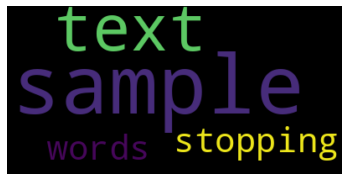

'This is a sample text with some stopping words'

In [168]:
from wordcloud import WordCloud
def generate_wordcloud(text):
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

generate_wordcloud(text)
text

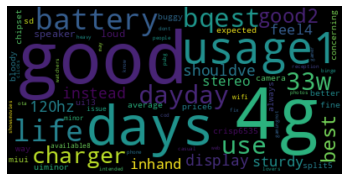

In [176]:
generate_wordcloud(df_score.Cleaned_Reviews.iloc[3])

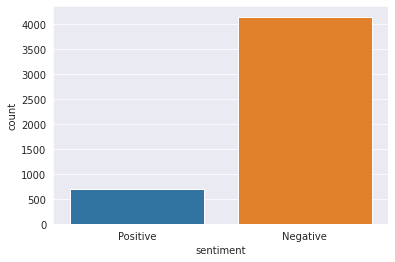

In [177]:
sns.countplot(x='sentiment',data=df_score)
plt.show()

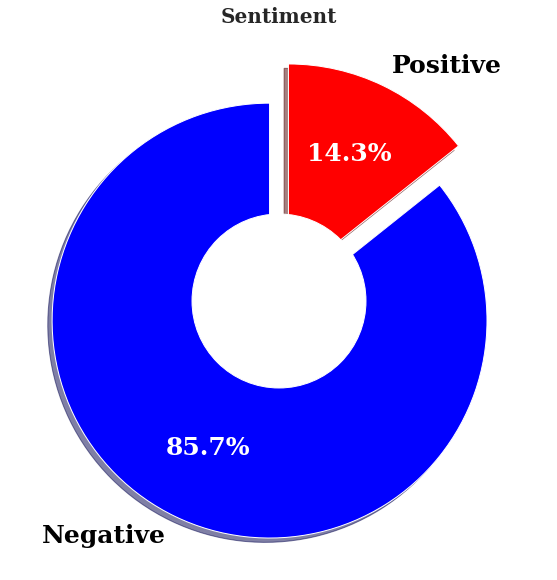

In [180]:
label_data = df_score['sentiment'].value_counts()
explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))


patches, texts, pcts = plt.pie(label_data,
            labels = label_data.index,
            colors = ['blue', 'red'],
            pctdistance = 0.65,
            shadow = True,
            startangle = 90,
            explode = explode,
            autopct = '%1.1f%%',
            textprops={ 'fontsize': 25,
                'color': 'black',
                'weight': 'bold',
                'family': 'serif' })



plt.setp(pcts, color='white')
hfont = {'fontname':'serif', 'weight': 'bold'}


plt.title('Sentiment', size=20, **hfont)


centre_circle = plt.Circle((0,0),0.40,fc='white')


fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

## Can VADER is better than TextBlob for Sentiment Analysis?